# RFMによる顧客管理
## 西山
## 2019/01

本資料はOBS授業「ビジネスデータ分析」の第７回授業「顧客管理のためのデータ分析」を補足するものです。使用しているサンプルデータファイル"RFM.csv"は照井伸彦・佐藤忠彦『現代マーケティングリサーチ』所載のデータです。。但し、分析作業は原著者とは関係なく、西山が行ったことをお断りしておきます。

In [1]:
rfm <- read.csv(file="RFM.csv")

デーファイルを読み込んだ後、まずは**要約**して大雑把にデータの中身をみておくが**鉄則**です。

In [2]:
dim(rfm) # 行数と列数を確認
summary(rfm)　# 要約する

[1] 2000    5

    Customer            M                F               R            DM      
 Min.   :   1.0   Min.   :   467   Min.   : 1.00   Min.   :  1.00   no :1279  
 1st Qu.: 500.8   1st Qu.:141747   1st Qu.: 6.00   1st Qu.: 20.75   yes: 721  
 Median :1000.5   Median :274411   Median :12.00   Median : 41.00             
 Mean   :1000.5   Mean   :276496   Mean   :12.81   Mean   : 55.22             
 3rd Qu.:1500.2   3rd Qu.:418265   3rd Qu.:18.00   3rd Qu.: 74.00             
 Max.   :2000.0   Max.   :549795   Max.   :40.00   Max.   :229.00             

数量データR, F, Mについてはヒストグラムもみておく。これを習慣づけましょう。

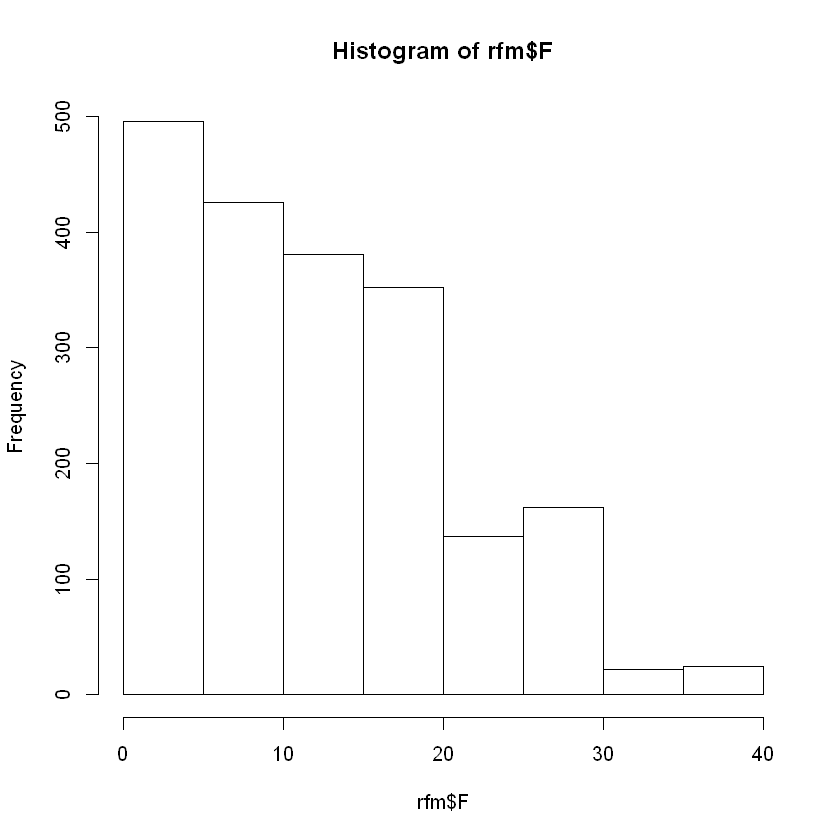

In [3]:
hist(rfm$F)

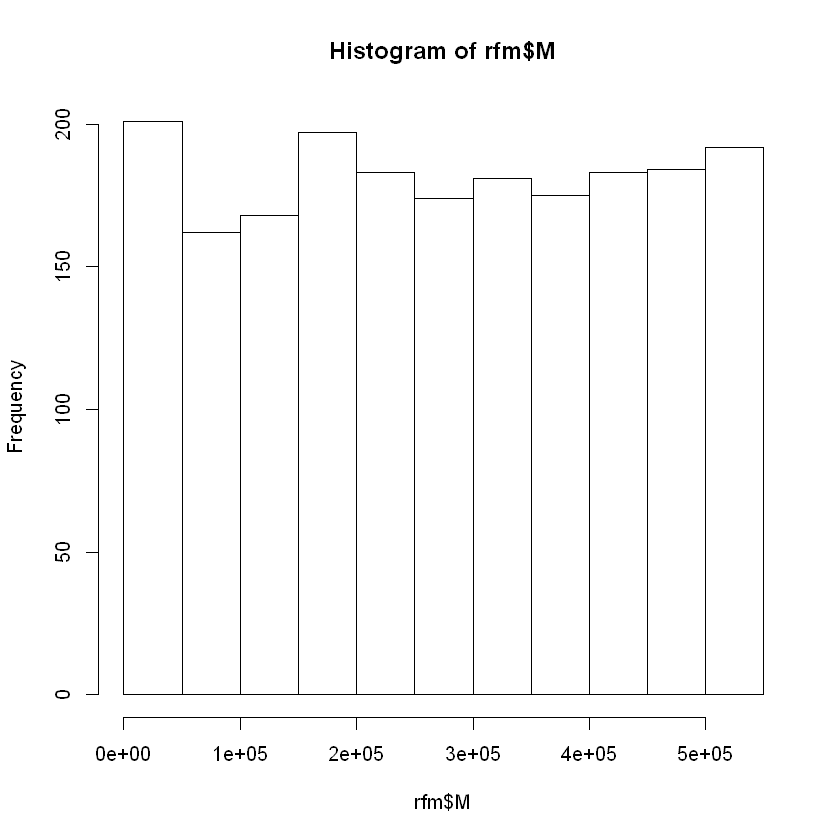

In [4]:
hist(rfm$M)

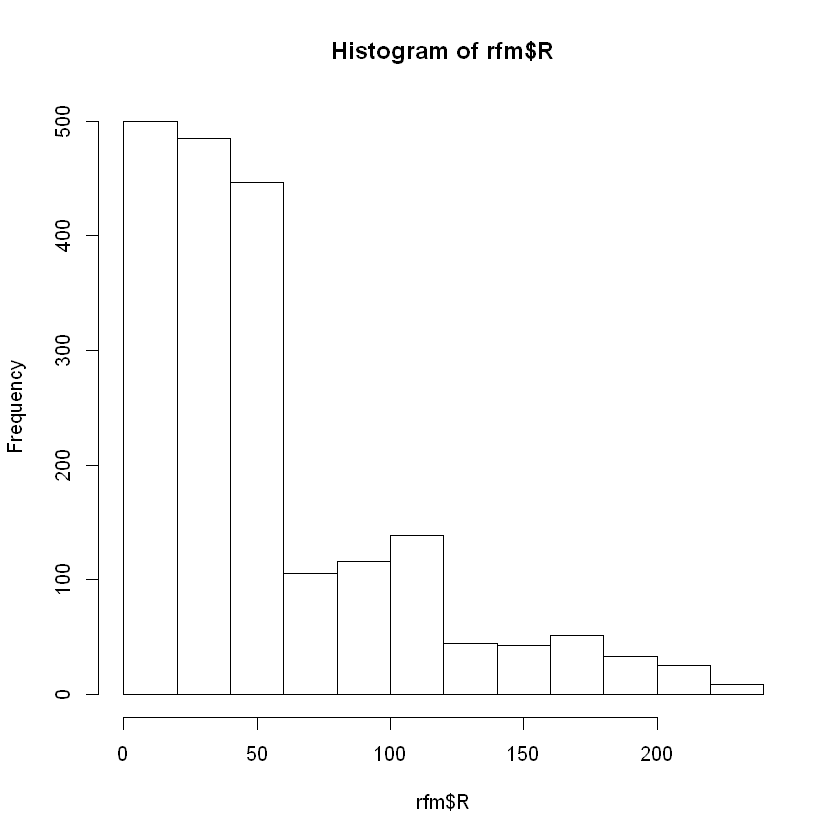

In [5]:
hist(rfm$R)

## ５分位分析（デシル分析の簡単版）

変数R, F, Mはそれぞれ「直近来店時からの経過日数」、「累積来店回数」、「累積購買金額」であり、CRMのための基本三因子として活用されるようになってきています。まずはシンプルなデータ活用法である10分位分析（デシル分析）、但しこの資料ではレコード数が2000人と比較的少数のため5分位分析を行ってみることにします。

それには、F,M,Rそれぞれを大小順に並べてから、同じ人数ずつ5つのクラスにわけます。2000人を400人ずつ5つのクラスに分けたうえ、クラスには"F1"から"F5"、"M1"から"M5"、"R1"から"R5"のように名前をつけることにします。元の数量データをその大きさに従って区分し、クラスに名前をつけるわけですから行うことは数値から分類カテゴリーへの変換です。そのためこのような作業を**カテゴリー化**と言います。

カテゴリー化には"cut"コマンドを使います。クラス名を値とする新たな質的変数は分類のための因子（＝ファクター）になります。

In [2]:
qt <- quantile(rfm$F, probs = c(0,0.2,0.4,0.6,0.8,1))
rankF <- cut(rfm$F, breaks = qt, labels = c("F1", "F2", "F3", "F4", "F5"), include.lowest = TRUE)

In [3]:
class(rankF)
length(rankF)
rfm$F[1:20]
rankF[1:20]
table(rankF)

[1] "factor"

[1] 2000

[1]  6  4 15 30 12  4  6 15  4 13 19 24 17 25  3  3 11  8 14 24

[1] F2 F1 F4 F5 F3 F1 F2 F4 F1 F3 F4 F5 F4 F5 F1 F1 F3 F2 F3 F5
Levels: F1 F2 F3 F4 F5

rankF
 F1  F2  F3  F4  F5 
496 334 389 436 345 

同じ値は同じクラスに入るため、値が小数ではなく、整数で値が重複する人が多い場合は、正確に400人ずつのクラスにはなりません。とはいえ、分析に困ることはありません。下の、累積購買金額は1円単位で値が入力されているということもあって、400人ずつのクラスができました。

In [4]:
qt <- quantile(rfm$M, probs = c(0,0.2,0.4,0.6,0.8,1))
rankM <- cut(rfm$M, breaks = qt, labels = c("M1", "M2", "M3", "M4", "M5"), include.lowest = TRUE)
length(rankM)
table(rankM)

[1] 2000

rankM
 M1  M2  M3  M4  M5 
400 400 400 400 400 

In [5]:
qt <- quantile(rfm$R, probs = c(0,0.2,0.4,0.6,0.8,1))
rankR <- cut(rfm$R, breaks = qt, labels = c("R5", "R4", "R3", "R2", "R1"), include.lowest = TRUE)
length(rankR)
table(rankR)

[1] 2000

rankR
 R5  R4  R3  R2  R1 
400 419 387 395 399 

In [6]:
library(ggplot2) # グラフ作成の定番パッケージです。もしこのコマンドでエラーが出る場合、インストールして下さい。

累積来店回数（F)の箱ひげ図をrankFで層別化して作成すると、以下のようになります。クラスが最下位の"F1"からより上位のクラスへ移るごとに来店回数が増えていることが再確認できます。

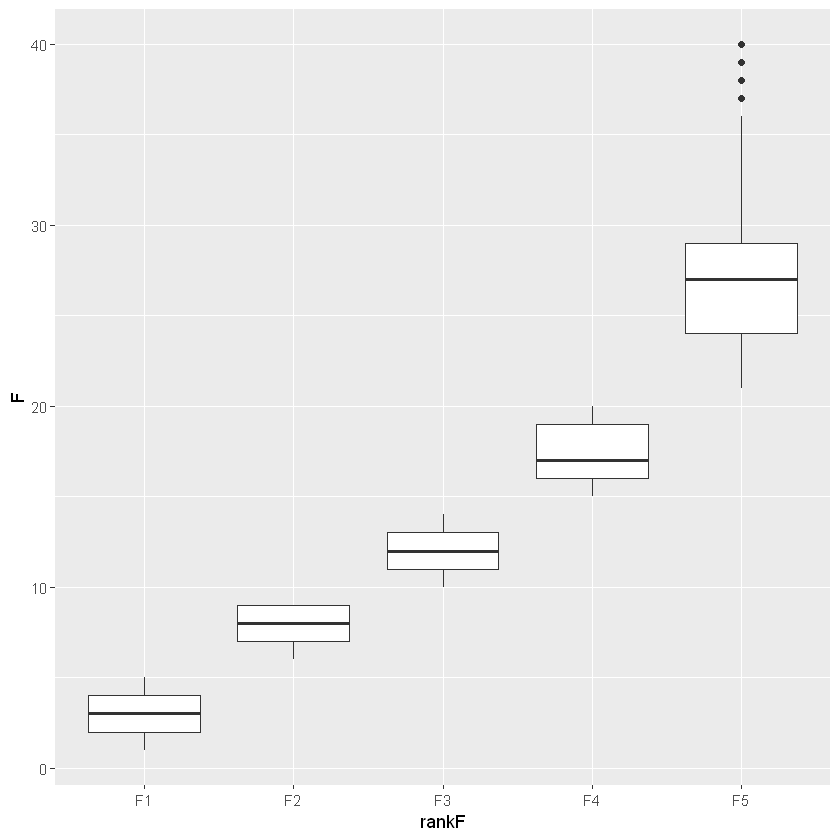

In [11]:
ggplot(rfm, aes(x=rankF, y=F)) + geom_boxplot()

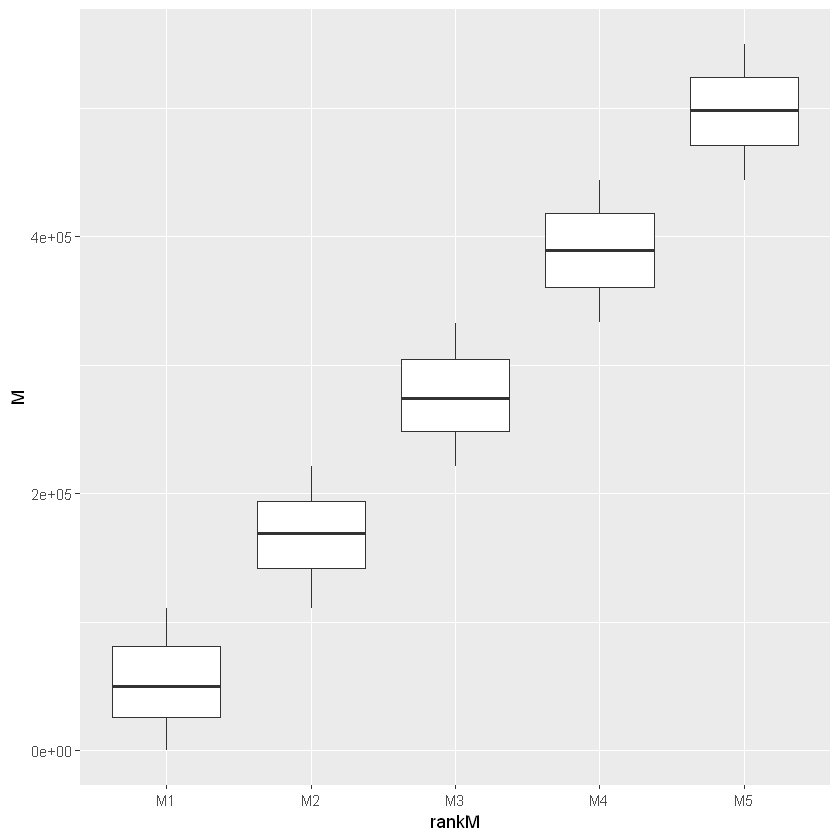

In [12]:
ggplot(rfm, aes(x=rankM, y=M)) + geom_boxplot()

直近来店時からの経過日数（R)については最も経過日数が少ないクラスを高く評価して"R5"としている点に注意の事。

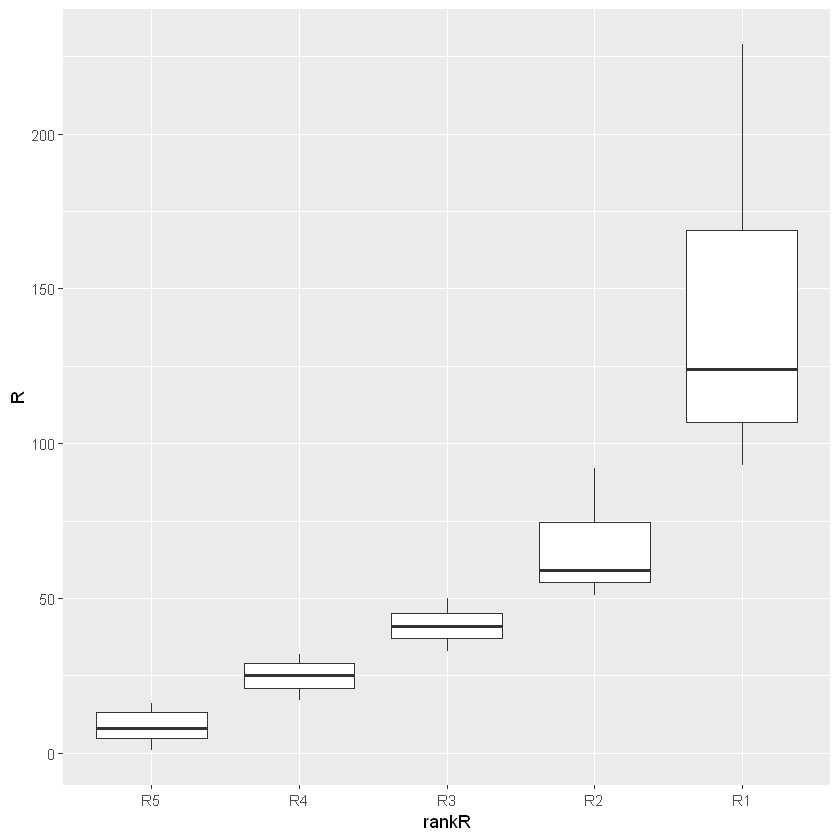

In [13]:
ggplot(rfm, aes(x=rankR, y=R)) + geom_boxplot()

Rコマンダーでは数値変数を区分したときのクラス名は自動的に同じデータセットに追加されましたが、コマンドで操作しているときは、新しく作った変数が自動的にどこかに追加されることはありません。Rコマンダーで「データセット」というのは、実は「データフレーム(data.frame)」と呼ばれるタイプの変数ですが、データフレームに新しくデータを追加するときは以下のようにします。

In [7]:
rfm <- data.frame(rfm, rankF, rankM, rankR) # 同じ長さ（行数）の表やデータを一つにまとめる
class(rfm)
head(rfm) # 最初の何行かをみたいときは"head"コマンドを使う

[1] "data.frame"

Customer,M,F,R,DM,rankF,rankM,rankR
1,311349,6,6,yes,F2,M3,R5
2,509794,4,28,yes,F1,M5,R4
3,176331,15,51,yes,F4,M2,R2
4,402413,30,33,yes,F5,M4,R3
5,16689,12,4,no,F3,M1,R5
6,263978,4,126,no,F1,M3,R1


## 来店回数と購買金額で優良顧客を選び出す

In [15]:
goodF <- subset(rfm, subset = (rankF=="F5"|rankF=="F4")) # 行や列を取り出すときはエクセルよりRのほうが遥かに効率的
dim(goodF)
head(goodF,10)

[1] 781   8

,Customer,M,F,R,DM,rankF,rankM,rankR
3,3,176331,15,51,yes,F4,M2,R2
4,4,402413,30,33,yes,F5,M4,R3
8,8,125001,15,35,no,F4,M2,R3
11,11,219339,19,50,yes,F4,M2,R3
12,12,418277,24,4,yes,F5,M4,R5
13,13,191852,17,58,yes,F4,M2,R2
14,14,325230,25,20,no,F5,M3,R4
20,20,468018,24,46,yes,F5,M5,R3
23,23,312326,26,4,yes,F5,M3,R5
24,24,522631,34,25,yes,F5,M5,R4


In [16]:
goodFM <- subset(goodF, subset = (rankM=="M5"|rankM=="M4")) # 来店回数（F)で上位層を取り出した後、購買金額（M)の上位層を抽出する
dim(goodFM)
head(goodFM,10)

[1] 457   8

,Customer,M,F,R,DM,rankF,rankM,rankR
4,4,402413,30,33,yes,F5,M4,R3
12,12,418277,24,4,yes,F5,M4,R5
20,20,468018,24,46,yes,F5,M5,R3
24,24,522631,34,25,yes,F5,M5,R4
26,26,440905,20,34,yes,F4,M4,R3
27,27,515250,34,21,yes,F5,M5,R4
32,32,498366,23,13,yes,F5,M5,R5
35,35,495402,26,54,no,F5,M5,R2
43,43,547412,31,27,yes,F5,M5,R4
45,45,472860,22,23,no,F5,M5,R4


In [17]:
summary(goodFM) # rankF, rankMを確認のこと

    Customer            M                F               R           DM     
 Min.   :   4.0   Min.   :333292   Min.   :15.00   Min.   : 1.00   no :118  
 1st Qu.: 512.0   1st Qu.:397427   1st Qu.:19.00   1st Qu.:14.00   yes:339  
 Median : 951.0   Median :452068   Median :24.00   Median :27.00            
 Mean   : 998.3   Mean   :448627   Mean   :24.08   Mean   :27.95            
 3rd Qu.:1490.0   3rd Qu.:504388   3rd Qu.:28.00   3rd Qu.:41.00            
 Max.   :2000.0   Max.   :549795   Max.   :40.00   Max.   :60.00            
 rankF    rankM    rankR   
 F1:  0   M1:  0   R5:132  
 F2:  0   M2:  0   R4:148  
 F3:  0   M3:  0   R3:116  
 F4:149   M4:211   R2: 61  
 F5:308   M5:246   R1:  0  
                           

## ロジステッィク回帰分析で予測モデル―全データ

データの全体を使ってダイレクトメール（クーポン付き）への反応予測モデルを作る方が良いというのはその通りです。

In [18]:
model1 <- glm(DM ~ F + M + R, family=binomial(link="logit"), data=rfm)

In [19]:
summary(model1)


Call:
glm(formula = DM ~ F + M + R, family = binomial(link = "logit"), 
    data = rfm)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5349  -0.7560  -0.3634   0.7937   2.7024  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.193e+00  1.857e-01 -11.810  < 2e-16 ***
F            9.488e-02  8.553e-03  11.093  < 2e-16 ***
M            3.505e-06  3.900e-07   8.987  < 2e-16 ***
R           -1.580e-02  2.014e-03  -7.845 4.32e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2614.8  on 1999  degrees of freedom
Residual deviance: 1910.5  on 1996  degrees of freedom
AIC: 1918.5

Number of Fisher Scoring iterations: 5


In [20]:
exp(model1$coefficients) # オッズ比に与える効果

(Intercept)           F           M           R 
   0.111547    1.099526    1.000004    0.984324

In [21]:
rfm$prob <- model1$fitted.values
summary(rfm$prob)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003957 0.120302 0.308469 0.360500 0.570401 0.966078 

ダイレクトメールに反応する確率がどう分布しているかをグラフにします。

実際には反応している人は3人に1人程度ですから、反応確率の山はかなり低い所にあります。しかし、あまり得る所は多くはない図であるのも事実ですね(^^;;)

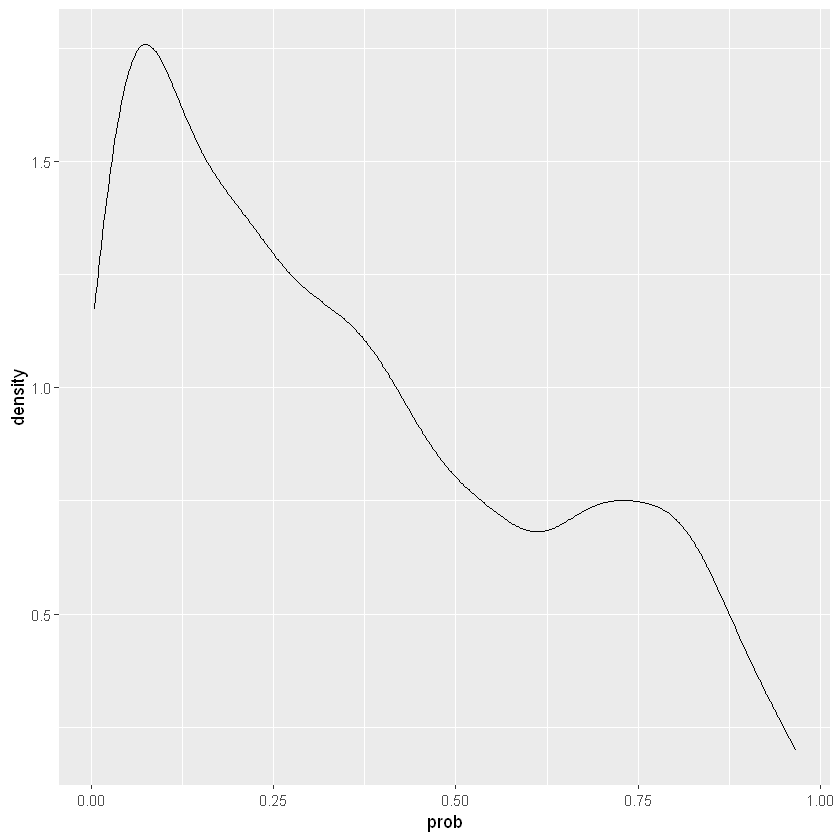

In [22]:
ggplot(rfm, aes(x=prob)) + geom_line(stat="density")

反応確率"prob"の分布を見るとしても、顧客全体の分布ではなく、たとえば前回ダイレクトメール（クーポン付き）に反応したか、しなかったかで層別化したグラフならもっと多くのことが分かるかもしれません。

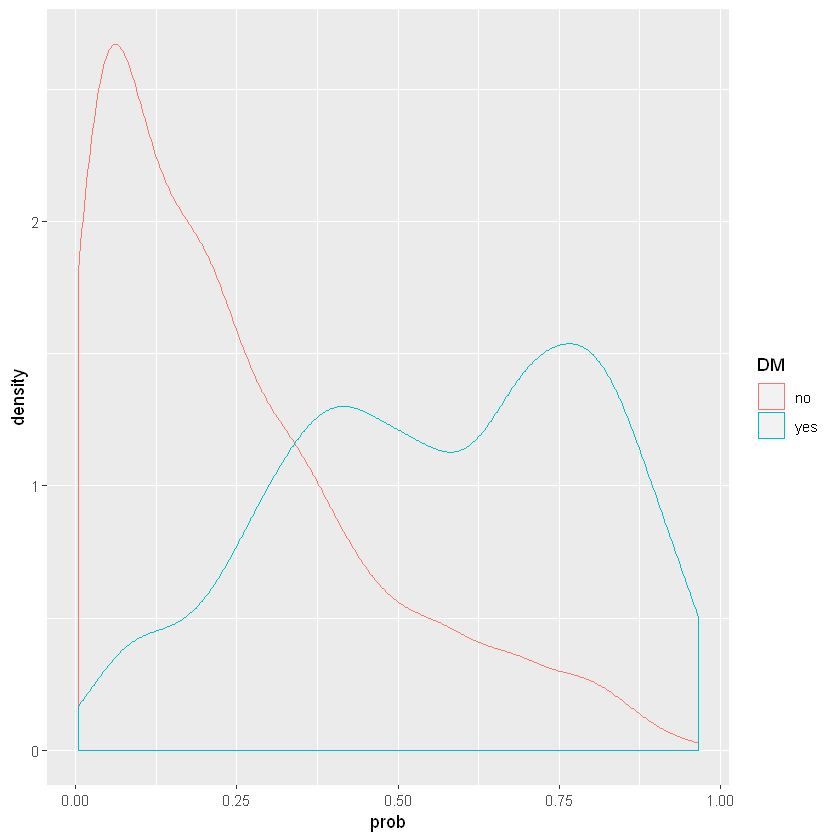

In [27]:
ggplot(rfm, aes(x=prob,color=DM)) + geom_density()

上のようなグラフを**Double Density Plot**と呼んでいます。これを見ると、前回メールに反応したグループは無反応であったグループに比べて説明変数F,M,Rから計算された反応確率が明らかに高い傾向があります。

もしも、これまでの顧客の行動履歴（F,M,R)がダイレクトメールに反応するかどうかと何も関連性がないのだとすれば、上の図の二つの分布図は重なっていたはずです。上の図は重なってはおらず、F,M,Rから計算される反応確率の出方が実際に反応したかどうかと関係がある、つまりその人の反応確率を計算しておくことは、その人の行動を予測するのに役立つわけです。

ただ分布図の分離の度合いは弱いものです。もしも赤い方の分布曲線が左にもっと偏り、青い曲線が右に偏り、完全に分離されている状態であれば、その人の反応確率が低いことは即ち「前回メールに無反応」とイコールになる、換言すれば行動履歴からメールへの反応をほぼ正確に予測できる。そう言えるわけです。

下図は来店回数の階級(rankF)で層別化した分布図です。これをみると、来店回数の階級ごとに反応確率がハッキリと分離されている（＝重なっている）ことが分かります。言葉を変えると、ダイレクトメールに反応して来店するかどうかに対して、それまでの累積来店回数の多寡がハッキリした効果をもっている、そんな理屈になります。もし来店回数とクーポンへの反応が無関係であれば、来店回数でクラス分けしても、クラスごとの反応確率の分布に影響はない、つまり分布図は重なっていなければなりません。

ロジステッィク回帰分析の計算結果をみても、係数の大きさから察しはつくのですが、こうしてグラフに見える化する手法の方をおすすめしなす。

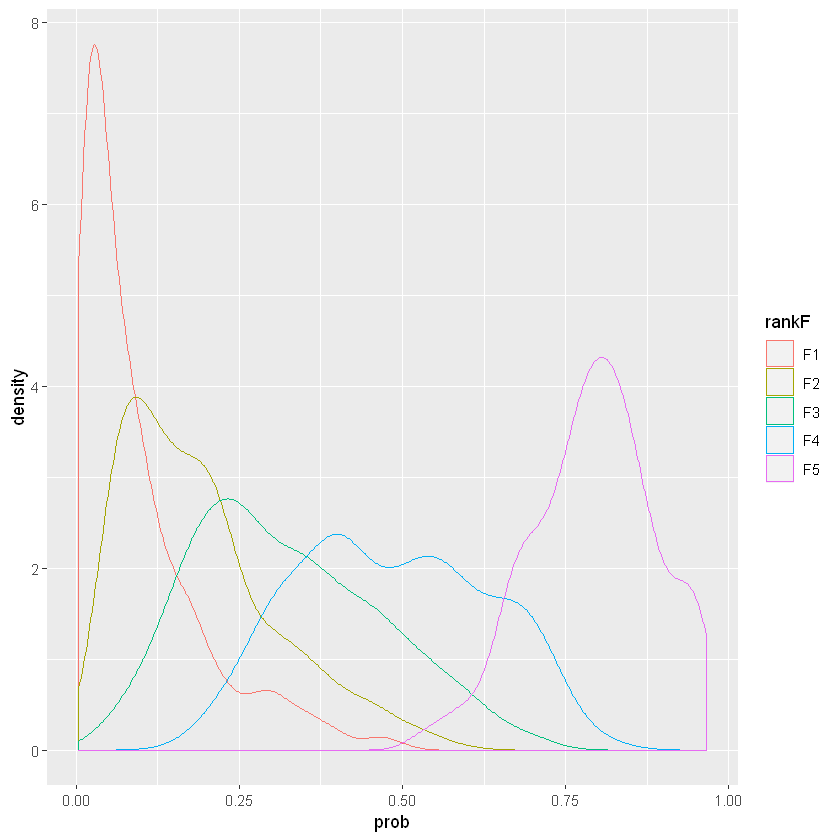

In [23]:
ggplot(rfm, aes(x=prob, color=rankF)) + geom_density()

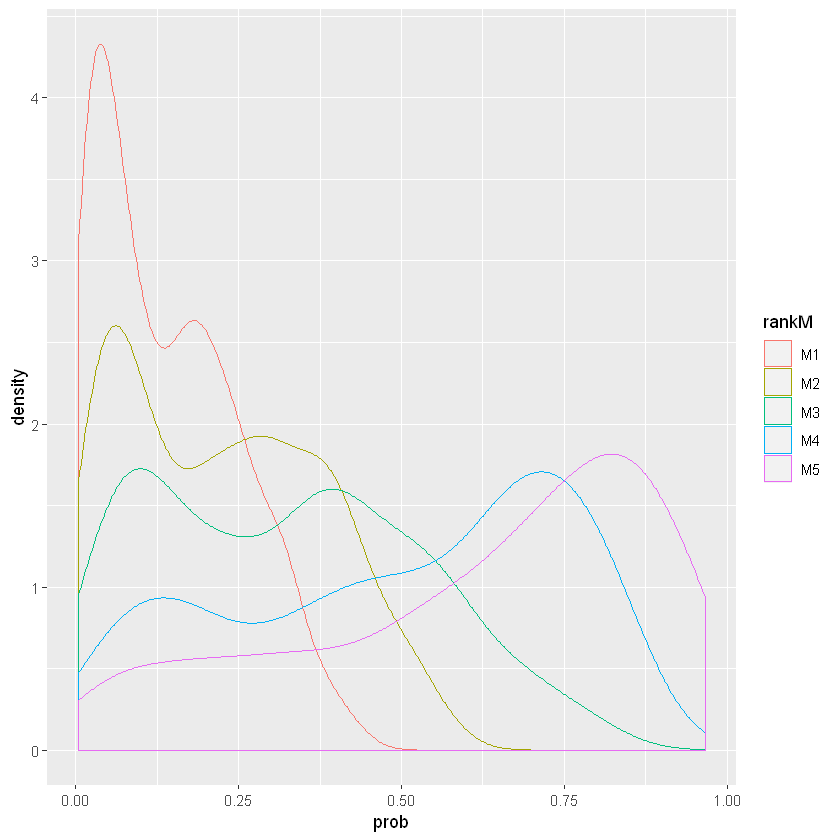

In [60]:
ggplot(rfm, aes(x=prob, color=rankM)) + geom_density()

累積購買金額（M)も反応確率に影響することが上の図をみればわかります。それに対して、直近来店時から経過日数は、特に"R3", "R4", "R5"の分布図が重なっています。ということは、経過日数はクーポンへの反応にほとんど影響がないということです。ただ、”R1"クラスだけは来店する可能性がほとんどないことがハッキリしていいます。

経過日数については、クラス"R1"に含まれるかどうかだけが重要だと言えそうです。

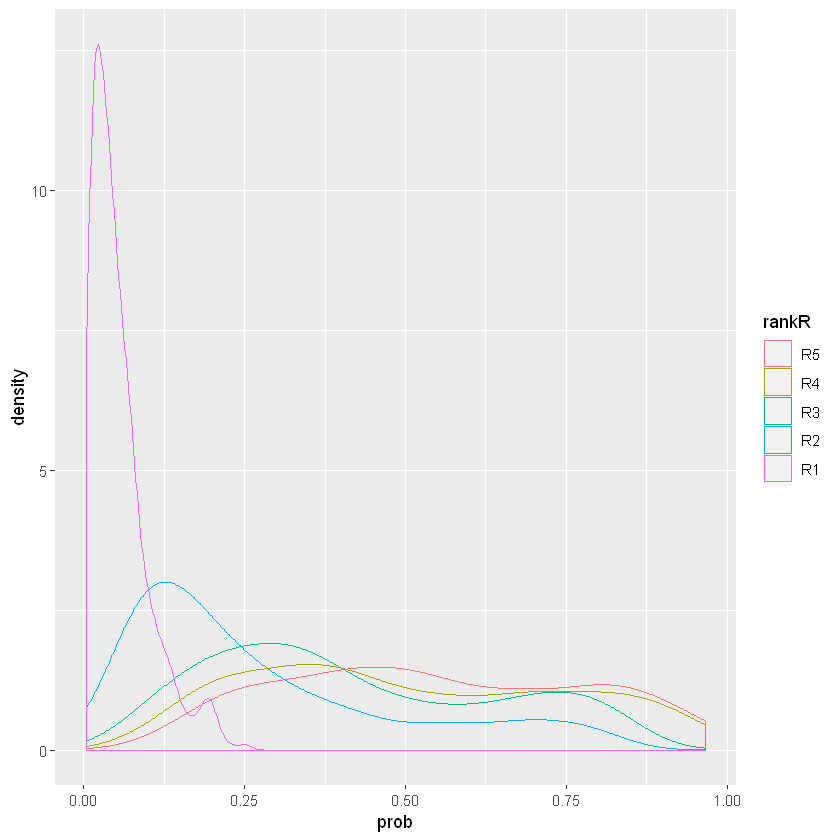

In [24]:
ggplot(rfm, aes(x=prob, color=rankR)) + geom_density()

一応、経過日数で最も下位にある"R1"は、具体的にどの程度の日数がたっている客なのか？この点だけを確かめておきましょう。

In [25]:
summary(subset(rfm, rankR == "R1"))

    Customer            M                F                R           DM     
 Min.   :   6.0   Min.   :   467   Min.   : 1.000   Min.   : 93.0   no :372  
 1st Qu.: 477.0   1st Qu.: 89613   1st Qu.: 2.000   1st Qu.:107.0   yes: 27  
 Median : 961.0   Median :196858   Median : 4.000   Median :124.0            
 Mean   : 971.3   Mean   :221939   Mean   : 4.323   Mean   :138.3            
 3rd Qu.:1482.5   3rd Qu.:336870   3rd Qu.: 6.000   3rd Qu.:169.0            
 Max.   :1999.0   Max.   :549734   Max.   :10.000   Max.   :229.0            
 rankF    rankM    rankR         prob         
 F1:287   M1:118   R5:  0   Min.   :0.003957  
 F2: 91   M2:101   R4:  0   1st Qu.:0.021265  
 F3: 21   M3: 78   R3:  0   Median :0.041787  
 F4:  0   M4: 55   R2:  0   Mean   :0.054865  
 F5:  0   M5: 47   R1:399   3rd Qu.:0.073996  
                            Max.   :0.250402  

上のコマンドの意味は、データセット"rfm"からrankRの値が"R1"である行（＝客）だけを抜き取り（subsetコマンド）、その後で要約をする（summaryコマンド）ものです。

これを見ると、経過日数が93日以上になっています（最大は229日経過）。要するに、最後に来てから3か月以上たっている顧客はダイレクトメールにまずは反応しない。そう予測してもよい。前回ダイレクトメールへの反応実績に基づく限り、こんな見込みがたちそうです。

## ロジステッィク回帰分析で予測モデル―通常作業

顧客行動の予測モデルを作成する際には、通常、データ全体を推定に使用する**トレーニングデータ**と予測能力の評価に使う**テストデータ**の二つに分割しています。多くの場合、テスト用に使うデータ割合は10％を目安にしても問題はないと思われます。ここでは全データ2000人からランダムに200人をテスト用に留保し、残りの1800人を予測モデル作成に使うことにします。

テスト用のデータセットを抜き取る方法には複数のやり方があります。最も単純な方法はデータセット"rfm"の第1行から第200行までをテストデータに、第201行から最後の行までをトレーニングデータとするやり方です。ただ、もしもデータセット中の顧客の順番が何かの基準、たとえば郵便番号などでソートされている可能性もあることを考慮すれば、ランダムに200人を抽出しテストデータとする方法がより望ましいかもしれません。それには"sample"コマンドが便利です。例えば、1から10までの整数を並べ替えるには以下のようにします。

In [26]:
sample(1:10,10)

[1]  3  8  5  4  6  7  2 10  9  1

しかし、"sample"コマンドの利用にも欠点はあります。それはこのコマンドでサンプルを抽出するたびに異なったサンプルが選ばれてしまう。そのため残りのトレーニングデータもその都度異なる、推定される予測モデルも変化するという点です。

この点で利便性があるのは、あらかじめ乱数を2000個作っておいて、それをデータセットに含めておく方法です。一度発生さえた乱数を含めてデータセットを保存しておくと、次回の作業からは同じトレーニングデータをサンプリングすることができます -- 分析対象になっているデータセットの一部に必ず追加しなければならないわけではありませんが、たとえばZumel[2014]では"runif"コマンドで一様乱数を発生させ、それをフルサンプルを含むデータセットに追加しておく方法を推奨しています。

In [8]:
rfm$gp <- runif(2000) # grp <- runif(2000)としておいても問題ない。ただ変数"grp"も保存しておくことは必要。

In [9]:
dim(rfm)
head(rfm)

[1] 2000    9

Customer,M,F,R,DM,rankF,rankM,rankR,gp
1,311349,6,6,yes,F2,M3,R5,0.75545546
2,509794,4,28,yes,F1,M5,R4,0.01200388
3,176331,15,51,yes,F4,M2,R2,0.81907189
4,402413,30,33,yes,F5,M4,R3,0.55377111
5,16689,12,4,no,F3,M1,R5,0.71629504
6,263978,4,126,no,F1,M3,R1,0.09355139


In [10]:
save(rfm, file="RFM.RData") # ここで作業としては一段落

### 予測能力の評価

In [11]:
load(file="RFM.RData")

データ全体の10%をテストデータ、残り90%をトレーニングデータとして区分します。それには乱数の"gp"に着目します。

In [12]:
test <- subset(rfm, rfm$gp <= 0.1)
train <- subset(rfm, rfm$gp > 0.1)
dim(test)
dim(train)

[1] 188   9

[1] 1812    9

上に見るように、正確に10%をテストデータとして抽出してはいませんが、こうしておくとデータセットに追加された乱数は固定されるため、計算の執行錯誤を反復する中で同じテストデータを使い続けることが可能になります。

データ全体をスプリットした時点で、トレーニングデータとテストデータの要約を見ておきます。

以下に見るとおり、RFMの各種属性、反応確率、ダイレクトメールへの反応割合とも概ね同じになっているので、二つのグループの傾向は同じであると判定できます。

In [13]:
dim(train)
summary(train[,-10])

[1] 1812    9

    Customer            M                F               R            DM      
 Min.   :   1.0   Min.   :   467   Min.   : 1.00   Min.   :  1.00   no :1164  
 1st Qu.: 501.8   1st Qu.:141314   1st Qu.: 6.00   1st Qu.: 21.00   yes: 648  
 Median : 999.5   Median :274027   Median :12.00   Median : 41.00             
 Mean   :1001.4   Mean   :275488   Mean   :12.82   Mean   : 54.90             
 3rd Qu.:1501.2   3rd Qu.:415103   3rd Qu.:18.00   3rd Qu.: 73.25             
 Max.   :2000.0   Max.   :549795   Max.   :40.00   Max.   :229.00             
 rankF    rankM    rankR          gp        
 F1:450   M1:363   R5:356   Min.   :0.1001  
 F2:309   M2:365   R4:385   1st Qu.:0.3227  
 F3:341   M3:362   R3:348   Median :0.5506  
 F4:400   M4:368   R2:366   Mean   :0.5479  
 F5:312   M5:354   R1:357   3rd Qu.:0.7724  
                            Max.   :0.9987  

In [14]:
dim(test)
summary(test[,-10])

[1] 188   9

    Customer            M                F               R            DM     
 Min.   :   2.0   Min.   :  4658   Min.   : 1.00   Min.   :  1.00   no :115  
 1st Qu.: 494.8   1st Qu.:150608   1st Qu.: 6.00   1st Qu.: 19.75   yes: 73  
 Median :1058.5   Median :282655   Median :12.00   Median : 40.00            
 Mean   : 991.4   Mean   :286210   Mean   :12.69   Mean   : 58.27            
 3rd Qu.:1483.2   3rd Qu.:440733   3rd Qu.:18.00   3rd Qu.: 75.00            
 Max.   :1996.0   Max.   :547994   Max.   :35.00   Max.   :228.00            
 rankF   rankM   rankR         gp           
 F1:46   M1:37   R5:44   Min.   :5.880e-06  
 F2:25   M2:35   R4:34   1st Qu.:2.581e-02  
 F3:48   M3:38   R3:39   Median :5.220e-02  
 F4:36   M4:32   R2:29   Mean   :5.077e-02  
 F5:33   M5:46   R1:42   3rd Qu.:7.533e-02  
                         Max.   :9.924e-02  

上のコマンドでtrain[,-10]、test[, -10]としているのは第10列にある一様乱数"gp"は要約に含めなくともよいからです。

まずトレーニング用のデータで行動予測モデルを作成し、その予測モデルを計算には含めなかったテストデータに適用して結果を予測することにします。テストデータについても、実際の行動やYesかNoで分かっていますから、予測された行動と実際の行動を比べることによって予測精度を評価することができます。

まずトレーニングデータから予測モデルを導出します。それを"model2"と名付けましょう。

In [15]:
model2 <- glm(DM ~ F + M + R, family=binomial(link="logit"), data=train)

In [16]:
summary(model2)


Call:
glm(formula = DM ~ F + M + R, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5364  -0.7512  -0.3728   0.7742   2.6852  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.231e+00  1.962e-01 -11.368  < 2e-16 ***
F            9.853e-02  9.084e-03  10.847  < 2e-16 ***
M            3.329e-06  4.114e-07   8.093 5.84e-16 ***
R           -1.519e-02  2.128e-03  -7.136 9.58e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2363  on 1811  degrees of freedom
Residual deviance: 1728  on 1808  degrees of freedom
AIC: 1736

Number of Fisher Scoring iterations: 5


In [17]:
exp(model2$coefficients)

(Intercept)           F           M           R 
  0.1074507   1.1035462   1.0000033   0.9849253

（当然であるとも言えるのですが）上の結果"model1"とほぼ同様の結果が出ています。テストデータも概ね同じ傾向を示していますから、この予測モデルを適用しても大きな問題はないはずです　－　ただし、テストデータに含まれる個々の顧客は上の予測モデル作成には使ってはいないことに注意してください。

モデル"model2"の行動予測能力を評価しておきましょう。まず計算に使ったデータ"train"に対して、モデルから予測される行動と実際の行動とはどの程度一致しているでしょうか。

予測モデルから計算される反応確率から反応する（Y)か、反応しない（N)かという行動を予測しておきます。

In [18]:
pred <- predict(model2, newdata=train, type="response")
yosoku <- ifelse(pred > 0.5, "Y", "N")
yosoku <- as.factor(yosoku)

予想された行動と実際の行動の一致・不一致を表にすると以下のようになります。

In [19]:
tbl <- table(yosoku, train$DM)
tbl

      
yosoku   no  yes
     N 1006  263
     Y  158  385

上のような表を**混同行列(Confusion Matrix)**と呼んでいます。ロジスティック回帰分析に限らずクラス識別に用いるアルゴリズムには色々な方法が考案されています。故に、各種アルゴリズムを評価する指標が必要になりますが、その多くは混同行列から算出されます。

中でも頻繁に参照される重要な指標を以下に紹介します。順に**精度(Accuracy)**、**適合率(Precision)**、**再現率(Recall)**と言います。

In [22]:
(tbl[1,1]+tbl[2,2])/sum(tbl)

[1] 0.76766

精度は76.7%です。即ち、全体として76.7%の客の行動を三つの説明変数F,M,Rから正しく予測できています。

In [23]:
tbl[2,2]/sum(tbl[2,])

[1] 0.7090239

適合率は予測の的中率と言い換えることもできます。即ち、「メールに反応するだろう」と予測した客の70.9%は実際にメールに反応しています。

In [24]:
tbl[2,2]/sum(tbl[,2])

[1] 0.5941358

再現率は捕捉率と言ってもよいかもしれません。即ち、実際にメールに反応した客の59.4%は行動履歴F,M,Rから予測できていました。

但し、これらの評価指標は計算に用いたトレーニングデータに対して当てはまる値です。予測モデルは計算に用いたトレーニングデータに出来るだけ当てはまるように推定されるものです。計算に含めなかったテストデータに含まれる客の行動をどの程度正しく予測できるかがポイントになります。

ここで予測された行動と実際の行動を受けて、三つの評価指標を表示する関数を作っておきましょう。

In [25]:
eval <- function(pred, act){
    tbl <- table(pred, act)
    acc <- (tbl[1,1]+tbl[2,2])/sum(tbl)
    prec <- tbl[2,2]/sum(tbl[2,])
    rec <- tbl[2,2]/sum(tbl[,2])
    print(sprintf("Accuracy: %4.3f", acc))
    print(sprintf("Precision: %4.3f", prec))
    print(sprintf("Recall: %4.3f", rec))
}

In [26]:
eval(yosoku, train$DM)

[1] "Accuracy: 0.768"
[1] "Precision: 0.709"
[1] "Recall: 0.594"


次に、テストデータにモデル"model2"を適用して反応確率を求め、その予測能力を評価します。

In [27]:
pred <- predict(model2, newdata=test, type="response")
yosoku <- ifelse(pred > 0.5, "Y", "N")
yosoku <- as.factor(yosoku)

In [29]:
eval(yosoku, test$DM)

[1] "Accuracy: 0.745"
[1] "Precision: 0.719"
[1] "Recall: 0.562"


適合率はテストデータに対する値の方が上回っていますが、他の二つの指標は予想どおりトレーニングデータに対する方が上回ります。通常は、テストデータには計算に含めない新しいデータが含まれるわけですから、それを反映していない予測モデルをテストデータに適用した場合、トレーニングデータに示されたほどの予測力は出ないものです。

今度はトレーニングデータを全体の50％、テストデータを50%と半分に分けたうえで予測性能を出してみましょう。

まずトレーニングデータから予測モデルを作成します。

In [30]:
test <- subset(rfm, subset=(rfm$gp <= 0.5))
train <- subset(rfm, subset=(rfm$gp > 0.5))
model3 <- glm(DM ~ F + M + R, family=binomial(link="logit"), data=rfm)

トレーニングデータから予測評価を行います。

In [31]:
pred <- predict(model3, newdata=train, type="response")
yosoku <- as.factor(ifelse(pred > 0.5, "Y", "N"))
eval(yosoku, train$DM)

[1] "Accuracy: 0.781"
[1] "Precision: 0.714"
[1] "Recall: 0.634"


次いで、テストデータから予測評価を行います。

In [32]:
pred <- predict(model3, newdata=test, type="response")
yosoku <- as.factor(ifelse(pred > 0.5, "Y", "N"))
eval(yosoku, test$DM)

[1] "Accuracy: 0.749"
[1] "Precision: 0.697"
[1] "Recall: 0.560"


今度は三つの評価指標すべてにおいてテストデータのほうが劣っています。これが普通です。

しかしながら、（再現率において落ち方が大きい印象がありますが）評価指標は両者でそれほど大きな違いはなく、テストデータにもほぼ同程度の予測力が示されています。

実際の分析現場では、データを精細にフォローしようと過剰にモデルを複雑にする結果、新しく追加されたデータの予測では失敗するというケースがままあります。これを**オーバーフィッテイング**と呼んでいます。上の例では、トレーニングデータとテストデータで予測精度に大きな違いがなく、オーバーフィッテイングは生じていないことが分かります。

#### 参考文献

Zumel, N., J. Mount "Practical Data Science with R", 2014, Manning